In [1]:
from urllib.request import urlopen
import json
import sys
import fnmatch
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
unnecessary_chars = ["!",",",".","    ",":",";","?","(",")","—","*","»","…","«","—","-","„","”",'"',"°","'"]
stops = ['a', 'aby', 'ach', 'acz', 'aczkolwiek', 'aj', 'albo', 'ale', 'alez', 'ależ', 'ani', 'az', 'aż', 'bardziej', 'bardzo', 'beda', 'bedzie', 'bez', 'deda', 'będą', 'bede', 'będę', 'będzie', 'bo', 'bowiem', 'by', 'byc', 'być', 'byl', 'byla', 'byli', 'bylo', 'byly', 'był', 'była', 'było', 'były', 'bynajmniej', 'cala', 'cali', 'caly', 'cała', 'cały', 'ci', 'cie', 'ciebie', 'cię', 'co', 'cokolwiek', 'cos', 'coś', 'czasami', 'czasem', 'czemu', 'czy', 'czyli', 'daleko', 'dla', 'dlaczego', 'dlatego', 'do', 'dobrze', 'dokad', 'dokąd', 'dosc', 'dość', 'duzo', 'dużo', 'dwa', 'dwaj', 'dwie', 'dwoje', 'dzis', 'dzisiaj', 'dziś', 'gdy', 'gdyby', 'gdyz', 'gdyż', 'gdzie', 'gdziekolwiek', 'gdzies', 'gdzieś', 'go', 'i', 'ich', 'ile', 'im', 'inna', 'inne', 'inny', 'innych', 'iz', 'iż', 'ja', 'jak', 'jakas', 'jakaś', 'jakby', 'jaki', 'jakichs', 'jakichś', 'jakie', 'jakis', 'jakiś', 'jakiz', 'jakiż', 'jakkolwiek', 'jako', 'jakos', 'jakoś', 'ją', 'je', 'jeden', 'jedna', 'jednak', 'jednakze', 'jednakże', 'jedno', 'jego', 'jej', 'jemu', 'jesli', 'jest', 'jestem', 'jeszcze', 'jeśli', 'jezeli', 'jeżeli', 'juz', 'już', 'kazdy', 'każdy', 'kiedy', 'kilka', 'kims', 'kimś', 'kto', 'ktokolwiek', 'ktora', 'ktore', 'ktorego', 'ktorej', 'ktory', 'ktorych', 'ktorym', 'ktorzy', 'ktos', 'ktoś', 'która', 'które', 'którego', 'której', 'który', 'których', 'którym', 'którzy', 'ku', 'lat', 'lecz', 'lub', 'ma', 'mają', 'mało', 'mam', 'mi', 'miedzy', 'między', 'mimo', 'mna', 'mną', 'mnie', 'moga', 'mogą', 'moi', 'moim', 'moj', 'moja', 'moje', 'moze', 'mozliwe', 'mozna', 'może', 'możliwe', 'można', 'mój', 'mu', 'musi', 'my', 'na', 'nad', 'nam', 'nami', 'nas', 'nasi', 'nasz', 'nasza', 'nasze', 'naszego', 'naszych', 'natomiast', 'natychmiast', 'nawet', 'nia', 'nią', 'nic', 'nich', 'nie', 'niech', 'niego', 'niej', 'niemu', 'nigdy', 'nim', 'nimi', 'niz', 'niż', 'no', 'o', 'obok', 'od', 'około', 'on', 'ona', 'one', 'oni', 'ono', 'oraz', 'oto', 'owszem', 'pan', 'pana', 'pani', 'po', 'pod', 'podczas', 'pomimo', 'ponad', 'poniewaz', 'ponieważ', 'powinien', 'powinna', 'powinni', 'powinno', 'poza', 'prawie', 'przeciez', 'przecież', 'przed', 'przede', 'przedtem', 'przez', 'przy', 'roku', 'rowniez', 'również', 'sam', 'sama', 'są', 'sie', 'się', 'skad', 'skąd', 'soba', 'sobą', 'sobie', 'sposob', 'sposób', 'swoje', 'ta', 'tak', 'taka', 'taki', 'takie', 'takze', 'także', 'tam', 'te', 'tego', 'tej', 'ten', 'teraz', 'też', 'to', 'toba', 'tobą', 'tobie', 'totez', 'toteż', 'totobą', 'trzeba', 'tu', 'tutaj', 'twoi', 'twoim', 'twoj', 'twoja', 'twoje', 'twój', 'twym', 'ty', 'tych', 'tylko', 'tym', 'u', 'w', 'wam', 'wami', 'was', 'wasz', 'wasza', 'wasze', 'we', 'według', 'wiele', 'wielu', 'więc', 'więcej', 'wlasnie', 'właśnie', 'wszyscy', 'wszystkich', 'wszystkie', 'wszystkim', 'wszystko', 'wtedy', 'wy', 'z', 'za', 'zaden', 'zadna', 'zadne', 'zadnych', 'zapewne', 'zawsze', 'ze', 'zeby', 'zeznowu', 'zł', 'znow', 'znowu', 'znów', 'zostal', 'został', 'żaden', 'żadna', 'żadne', 'żadnych', 'że', 'żeby']

# Rozpoznawanie autora utworu literackiego na podstawie treści utworu z wykorzystaniem worka słów
#### Grupa 34
#### Autorzy projektu
* Banaszczak Michał - 311175
* Buczyński Hubert - 311186
* Maciąg Marcin - 311341
* Szcześniak Michał - 311491

## API Wolnych lektur
Portal Wolne lektury posiada obszerne API dostepne pod [tym adresem](https://wolnelektury.pl/api/). W naszym projekcie korzystaliśmy tylko z niewielkiej części dostępnych endpointów, reszta zwyczajnie nie była potrzebna.  
  
Każdy endpoint zwraca plik JSON. Tak wygląda przykładowy obiekt z listą wszystkich utworów w bazie Wolnych lektur...

In [3]:
url = 'https://wolnelektury.pl/api/books/'
response = urlopen(url)
booklist = json.loads(response.read())

booklist

[{'kind': 'Epika',
  'full_sort_key': 'verne jules gabriel$20 000 mil podmorskiej z~1eglugi$2848',
  'title': '20 000 mil podmorskiej żeglugi',
  'url': 'https://wolnelektury.pl/katalog/lektura/20-000-mil-podmorskiej-zeglugi/',
  'cover_color': '#961060',
  'author': 'Jules Gabriel Verne',
  'cover': 'book/cover/20-000-mil-podmorskiej-zeglugi.jpg',
  'epoch': 'Pozytywizm',
  'href': 'https://wolnelektury.pl/api/books/20-000-mil-podmorskiej-zeglugi/',
  'has_audio': True,
  'genre': 'Powieść',
  'simple_thumb': 'https://wolnelektury.pl/media/book/cover_api_thumb/20-000-mil-podmorskiej-zeglugi_vTapBJg.jpg',
  'slug': '20-000-mil-podmorskiej-zeglugi',
  'cover_thumb': 'book/cover_thumb/20-000-mil-podmorskiej-zeglugi_7sGyWnK.jpg',
  'liked': None},
 {'kind': 'Epika',
  'full_sort_key': 'krasicki ignacy$abuzei i tair$1239',
  'title': 'Abuzei i Tair',
  'url': 'https://wolnelektury.pl/katalog/lektura/abuzei-i-tair/',
  'cover_color': '#f2802e',
  'author': 'Ignacy Krasicki',
  'cover': 'boo

...a tak - pełny obiekt książki.

In [4]:
response = urlopen(booklist[0]['href'])
bookobj = json.loads(response.read())

bookobj

{'title': '20 000 mil podmorskiej żeglugi',
 'url': 'https://wolnelektury.pl/katalog/lektura/20-000-mil-podmorskiej-zeglugi/',
 'language': 'pol',
 'epochs': [{'url': 'https://wolnelektury.pl/katalog/epoka/pozytywizm/',
   'href': 'https://wolnelektury.pl/api/epochs/pozytywizm/',
   'name': 'Pozytywizm',
   'slug': 'pozytywizm'}],
 'genres': [{'url': 'https://wolnelektury.pl/katalog/gatunek/powiesc/',
   'href': 'https://wolnelektury.pl/api/genres/powiesc/',
   'name': 'Powieść',
   'slug': 'powiesc'}],
 'kinds': [{'url': 'https://wolnelektury.pl/katalog/rodzaj/epika/',
   'href': 'https://wolnelektury.pl/api/kinds/epika/',
   'name': 'Epika',
   'slug': 'epika'}],
 'authors': [{'url': 'https://wolnelektury.pl/katalog/autor/jules-gabriel-verne/',
   'href': 'https://wolnelektury.pl/api/authors/jules-gabriel-verne/',
   'name': 'Jules Gabriel Verne',
   'slug': 'jules-gabriel-verne'}],
 'translators': [{'name': 'tłumacz nieznany'}],
 'fragment_data': {'title': 'Jules Gabriel Verne, 20 0

Z całego tego obiektu interesują nas tylko trzy pola:
* authors - lista obiektów autorów dzieła, dla dzieł wybranych przez nas zawsze jednoelementowa
* txt - link do pobrania utworu jako prosty plik tekstowy
* slug

In [5]:
authors = bookobj['authors']
download = bookobj['txt']

print(download)
authors

https://wolnelektury.pl/media/book/txt/20-000-mil-podmorskiej-zeglugi.txt


[{'url': 'https://wolnelektury.pl/katalog/autor/jules-gabriel-verne/',
  'href': 'https://wolnelektury.pl/api/authors/jules-gabriel-verne/',
  'name': 'Jules Gabriel Verne',
  'slug': 'jules-gabriel-verne'}]

Pod paramentrem *slug* przechowywany jest unikalny identyfikator danego utworu czy autora. Są one czytelne i opisowe, a przy okazji rozwiązują główny mankament standardowych tytułów - nie posiadają znaków diakrytycznych ani znaków białych. Z tego względu zdecydowaliśmy używać tej konwencji nazewniczej w całym projekcie.

In [6]:
bookslug = booklist[0]['slug']
authslug = bookobj['authors'][0]['slug']

print(bookslug)
print(authslug)

20-000-mil-podmorskiej-zeglugi
jules-gabriel-verne


Przez pierwotny zamysł projektu stworzyliśmy także progarm *bookloader.py* pobierający wszystkie książki z całej bazy, z konkretnej epoki czy konkretnego autora. Posłużył nam do pobrania matriałów do testów napisanych przez nas klasyfikatorów na różnych zbiorach danych. Wszystkie pobrane teksty do poniższej analizy znajdują się w katalogu *../books*.

## Przegląd zbioru
Do przeprowadzenia projektu wybraliśmy ośmiu autorów, po trzy lub cztery dzieła od każdego.  
  
1. Adam Mickiewicz
    - Pan Tadeusz
    - Dziady cz. III
    - Dziady cz. IV
1. Henryk Sienkiewicz
    - Quo Vadis
    - Latarnik
    - Krzyżacy tom I
    - Krzyżacy tom II
1. Stefan Żeromski
    - Syzyfowe prace
    - Przedwiośnie
    - Ludzie bezdomni tom I
    - Ludzie bezdomni tom II
1. Stanisław Wyspiański
    - Wesele
    - Noc listopadowa
    - Akropolis
1. Zgromadzenie Ogólne ONZ
    - Deklaracja praw człowieka
    - Deklaracja praw dziecka
    - Konwencja o prawach dziecka
1. Bolesław Prus
    - Kamizelka
    - Dziwna historia
    - Powiastki cmentarne
1. Tadeusz Boy-Żeleński
    - Plotka o *Weselu* Wyspiańskiego
    - Piekło kobiet
    - Jak skończyć z piekłem kobiet
1. Eliza Orzeszkowa
    - Julianka
    - Dobra pani
    - Ascetka  
  
Zbiór ten jest zróżnicowany pod względem epok, gatunków, tematyki i rozmiaru. Dla niektórych autorów natomiast tematyki znacznie się pokrywają, a co za tym idzie mają dużo wspólnych tokenów. Oczywistym tego przykładem będzie chociażby Wyspiański i Boy-Żeleński.

### Analiza zbioru
Analizę zaczniemy od stworzenia worków słów dla każdego poszczególnego autora oraz słownika wszystkich tokenów wszystkich autorów.

In [7]:
def buildAllAuthorsWB(path) -> dict:
    paths = findBooksPaths(path)
    awb = dict()
    for p in paths:
        awb = retrieveTokensFromBook('..\\books', p, awb)
        
    for author in awb:
        awb[author] = dict(sorted(awb[author].items(), key=lambda x: x[1], reverse = True))
        
    return awb
        
def retrieveTokensFromBook(ogpath, path, awb) -> dict:
    usidx = path.index('_', len(ogpath)+1)
    author = path[len(ogpath)+1:usidx]

    awb[author] = awb.get(author, dict())
    tokens_stop = []
    tokens = []

    with open(path, 'r', encoding='utf-8') as book:
        for line in book:        
            for char in unnecessary_chars:
                line = line.replace(char, '')
            line = line.rstrip().lower().split()

            if line:
                tokens_stop.extend(line)

    for ts in tokens_stop:
        if not ts in stops:
            tokens.append(ts)

    for word in sorted(tokens):
        if word.isalpha():
            awb[author][word] = awb[author].get(word, 0) + 1
    
    return awb

def findBooksPaths(path) -> list:
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, '*_*.txt'):
                result.append(os.path.join(root, name))
    return result

def concatWB(allauthwb) -> dict:
    cumulativewb = dict()
    for author in allauthwb:
        for token in allauthwb[author]:
            cumulativewb[token] = cumulativewb.get(token, 0) + allauthwb[author][token]
    cumulativewb = dict(sorted(cumulativewb.items(), key=lambda x: x[1], reverse = True))
    return cumulativewb

def truncateAllAuthorsWB(allauthwb, lim) -> dict:
    truncated = dict()
    for author in allauthwb:
        tempWB = dict(sorted(allauthwb[author].items(), key=lambda x: x[1], reverse = True))
        allauthwb[author] = dict()

        count = min(len(tempWB.keys()), lim)
        for token in tempWB:
            truncated[author][token] = tempWB[token]

            if count < 0: break
            count -= 1
            
    return truncated
            
def truncateWB(wb, lim) -> dict:
    truncated = dict()
    count = min(len(list(wb.keys())), lim)
    for token in wb:
        truncated[token] = wb[token]
        
        if count <= 0: break
        count -= 1
            
    return truncated
            
def headwb(wb, wbrange=[-1,-1]):
    if wbrange[0] < 0 or wbrange[0] > len(wb):
        wbrange[0] = 0
    if wbrange[1] < 0 or wbrange[1] > len(wb):
        wbrange[1] = len(wb)
    
    if wbrange[1] > wbrange[0]:
        for i, (k, v) in enumerate(wb.items()):
            if i >= wbrange[0] and i < wbrange[1]:
                print(k, ":", v)

In [8]:
authorsWB = buildAllAuthorsWB('..\\books')

print('adam-mickiewicz:')
headwb(authorsWB['adam-mickiewicz'], [0, 7])

print('\nhenryk-sienkiewicz:')
headwb(authorsWB['henryk-sienkiewicz'], [0, 7])

print('\nstanislaw-wyspianski:')
headwb(authorsWB['stanislaw-wyspianski'], [0, 7])

print('\ntadeusz-boy-zelenski:')
headwb(authorsWB['tadeusz-boy-zelenski'], [0, 7])

adam-mickiewicz:
rzekł : 160
hrabia : 136
ksiądz : 132
sędzia : 127
potem : 118
choć : 111
panie : 107

henryk-sienkiewicz:
rzekł : 1394
zaś : 1231
zbyszko : 957
maćko : 690
począł : 660
chwili : 639
winicjusz : 612

stanislaw-wyspianski:
poeta : 250
książę : 228
gospodarz : 202
anioł : 192
młody : 183
scena : 155
panna : 142

tadeusz-boy-zelenski:
ciąży : 151
dzieci : 117
urodzeń : 70
kobiety : 52
komisji : 50
kobieta : 48
prawa : 45


In [9]:
cumulativeWB = concatWB(authorsWB)
cumulativeWB = truncateWB(cumulativeWB, 2000)

headwb(cumulativeWB, [0, 15])

rzekł : 1780
zaś : 1412
oczy : 1093
chwili : 1019
zbyszko : 957
panie : 879
miał : 842
raz : 763
czym : 752
począł : 722
mógł : 703
mówił : 700
domu : 690
maćko : 690
siebie : 674


Teraz mając skumulowany słownik możemy stworzyć macierz TDM dla wszystkich autorów (tematem projektu jest rozpoznawanie autora - nie konkretnego dzieła - zatem interpretujemy zbiór dzieł autora jako pojedynczy dokument).

In [10]:
def buildTDM(authorswb, cumwb) -> pd.DataFrame:
    authors = list(authorswb.keys())
    tdm = pd.DataFrame(columns=authors)
    for word in cumwb:
        licznik = [0]*len(authors)
        for i, author in enumerate(authors):
            for token in authorswb[author]:
                if word == token:
                    licznik[i] += authorswb[author][token]
        element = pd.DataFrame([licznik], columns=authors, index=[word])
        tdm = tdm.append(element)
    return tdm

In [11]:
TDMall = buildTDM(authorsWB, cumulativeWB)
# wykonanie trwa pare chwil, prosze uzbroic sie w cierpliwosc
TDMall

,adam-mickiewicz,boleslaw-prus,eliza-orzeszkowa,henryk-sienkiewicz,stanislaw-wyspianski,stefan-zeromski,tadeusz-boy-zelenski,zgromadzenie-ogolne-onz
rzekł,160,13,2,1394,10,199,2,0
zaś,41,13,20,1231,13,75,19,0
oczy,106,7,88,489,41,357,5,0
chwili,20,16,77,639,24,226,16,1
zbyszko,0,0,0,957,0,0,0,0
...,...,...,...,...,...,...,...,...
chora,1,0,4,13,1,16,6,0
jeńców,1,0,0,36,0,3,1,0
języka,1,1,0,6,0,27,0,6
niedoli,1,0,5,16,0,14,5,0


Mając taką reprezentację zbioru, możemy policzyć miarę TF-IDF.  
Miara TF określa jaką część wszystkich tokenów danego autora stanowi każdy konkretny token, zatem z niej możemy wnioskować jakie znaczenie dla odgadnięcia autora ma każdy poszczególny token. Tokeny częste i rzadkie w skali reszty autorów będą miały większe znaczenie.  
Miara IDF z kolei informuje nas o rzadkości danego tokenu w skali wszystkich autorów - im wyższy IDF, tym mniejszą liczbę autorów charakteryzuje dany token. 

In [12]:
def policz_tfidf(tdm):
    ile_slow = tdm.count(0)[0]
    ile_kategorii = tdm.shape[1]
    tf = np.empty((ile_slow,ile_kategorii))
    for i in range(0,ile_kategorii):
        tf[:,i] = np.array(tdm.iloc[:,i]/tdm.sum()[i])
    idf = np.log(ile_kategorii/np.array((tdm>0)*1).sum(axis=1))
    tfidf = pd.DataFrame((tf*np.array([idf,]*ile_kategorii).T*100), columns=tdm.columns, index = tdm.index)
    tfidf["w_ilu"] = (np.array((tdm>0)*1).sum(axis=1)).T
    tfidf["idf"] = idf.T
    return tfidf

In [13]:
tfidf = policz_tfidf(TDMall)
tfidf.head(20)

,adam-mickiewicz,boleslaw-prus,eliza-orzeszkowa,henryk-sienkiewicz,stanislaw-wyspianski,stefan-zeromski,tadeusz-boy-zelenski,zgromadzenie-ogolne-onz,w_ilu,idf
rzekł,0.095503,0.069548,0.002285,0.171953,0.009629,0.049505,0.004127,0.0,7,0.133531
zaś,0.024473,0.069548,0.022851,0.151847,0.012517,0.018658,0.039207,0.0,7,0.133531
oczy,0.063271,0.037449,0.100546,0.060319,0.039478,0.088810,0.010318,0.0,7,0.133531
chwili,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8,0.000000
zbyszko,0.000000,0.000000,0.000000,1.838327,0.000000,0.000000,0.000000,0.0,1,2.079442
panie,0.063868,0.294240,0.041132,0.059949,0.058735,0.031345,0.016508,0.0,7,0.133531
miał,0.056108,0.080247,0.007998,0.052301,0.020220,0.066421,0.028889,0.0,7,0.133531
raz,0.054914,0.058848,0.053700,0.041076,0.032738,0.054480,0.055715,0.0,7,0.133531
czym,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8,0.000000
począł,0.000000,0.056491,0.024130,0.286556,0.010167,0.043781,0.000000,0.0,5,0.470004


Teraz, wykorzystując macierz TDM i miary TF-IDF, sprawdźmy podobieństwo między zbiorami dzieł wszystkich autorów.

In [14]:
def odleglosc(x, y, typ = 'kosinusowa'):
    if typ == 'kosinusowa':
        return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))
    elif typ == 'Euklidesowa':
        return np.sqrt(np.sum((x - y) ** 2))
    else: # miejska
        return np.sum(np.abs(x - y))

legenda:
0 -> adam-mickiewicz
1 -> boleslaw-prus
2 -> eliza-orzeszkowa
3 -> henryk-sienkiewicz
4 -> stanislaw-wyspianski
5 -> stefan-zeromski
6 -> tadeusz-boy-zelenski
7 -> zgromadzenie-ogolne-onz


<AxesSubplot:>

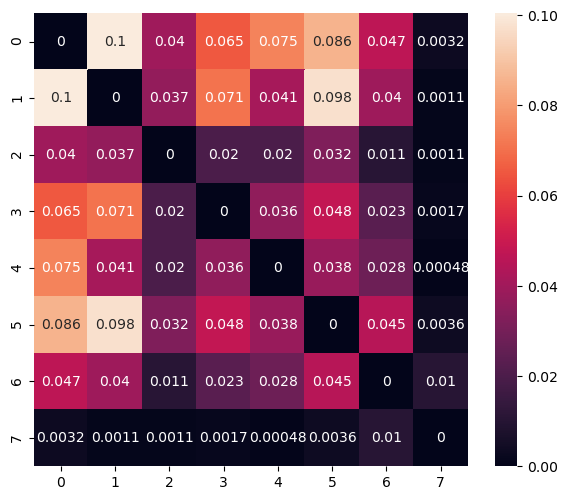

In [15]:
ilosc_autorow = len(list(authorsWB.keys()))

print('legenda:')
for i, auth in enumerate(authorsWB):
    print(i, "->", auth)

diffmatrix = np.empty([ilosc_autorow, ilosc_autorow])
for i in range(0, ilosc_autorow):
    for j in range(0, ilosc_autorow):
        diffmatrix[i, j] = odleglosc(tfidf.iloc[:,i],tfidf.iloc[:,j])
        
for i in range(0, ilosc_autorow):
    diffmatrix[i, i] = 0
        
plt.figure(figsize=(7,6),dpi = 100)
sns.heatmap(diffmatrix, annot=diffmatrix)

Diagonala powinna zawierać jedynki, natomiast reszta wartości w macierzy dla tak zróżnicowanego zbioru była bliska zeru, przez co większość mapy cieplnej miało niemożliwe do rozróżnienia odcienie. W związku z tym dla zwiększenia czytelności wartosci na diagonali zostały wyzerowane.  
  
Pierwsza rzecz która rzuca się w oczy to niskie podobieństwo między deklaracjami i konwencjami ONZ-u, a resztą zbioru. Ma to zapewne związek ze zdecydowanie mniejszym rozmiarem tych tekstów, jak i współczesnym urzędowym językiem, który znacząco różni się od języka poetyckiego.
Zgodnie z oczekiwaniami natomiast eseje Boya-Żeleńskiego o tematyce macierzyństwa mają stosunkowo wyższą notę podobieństwa do Konwencji i Deklaracji Praw Dziecka ONZ-u niż reszta zbioru.  
  
Podobieństwo między dziełami Wyspiańskiego i Boya-Żeleńskiego mają stosunkowo niskie podobieństwo, zwłaszcza biorąc pod uwagę fakt że jednym z analizowanych dzieł Żeleńskiego dosłownie odnosi się bezpośrednio do *Wesela* Wyspiańskiego. *Plotka o Weselu Wyspiańskiego* jest jednak krótsza od pozostałych jego esejów, zatem tokeny w niej zawarte musiały mieć niższe metryki TF.

Największe podobieństwo obserwujemy dla Bolesława Prusa w parach z Adamem Mickiewiczem oraz Stefanem Żeromskim. Podobieństwo wybranej twórczości Mickiewicza i Żeromskiego łatwo można wyjaśnić przez to, że zarówno *Pan Tadeusz* jak i *Przedwiośnie* mają motyw sielankowego życia szlachty, co owocuje dużą liczbą wspólnych tokenów. Podobieństwo do twórczości Bolesława Prusa ciężej nam uzasadnić - jest ono spowodowane zapewnie dużą ilością na pozór nieznaczących tokenów: "miał", "choć", "potem" itd.

In [16]:
print('boleslaw-prus:')
headwb(authorsWB['boleslaw-prus'], [0, 15])

print('\nadam-mickiewicz:')
headwb(authorsWB['adam-mickiewicz'], [0, 15])

print('\nstefan-zeromski:')
headwb(authorsWB['stefan-zeromski'], [0, 15])

boleslaw-prus:
panie : 55
dobrodzieju : 40
potem : 27
mecenas : 25
patron : 22
choć : 20
adwokat : 20
dzień : 17
telegrafista : 17
mówił : 16
trochę : 16
chwili : 16
gębarzewski : 16
domu : 15
miał : 15

adam-mickiewicz:
rzekł : 160
hrabia : 136
ksiądz : 132
sędzia : 127
potem : 118
choć : 111
panie : 107
tadeusz : 107
oczy : 106
senator : 106
domu : 100
cóż : 99
miał : 94
raz : 92
wojski : 89

stefan-zeromski:
judym : 392
cezary : 376
oczy : 357
miał : 267
chwili : 226
siebie : 224
raz : 219
drzwi : 207
rzekł : 199
cóż : 191
mówił : 190
rzeczy : 190
panna : 180
mógł : 174
przecie : 174
